In [1]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# setting global visualization styles
sns.set_style("white")
sns.set_palette('Blues')
sns.set(rc={'figure.figsize':(12,7)})

In [2]:
# reading all scraped json files (each a respective price range containing >=300 listings) into their own respective dfs
d60 = pd.read_json('deauville_60.json')
d60_75 = pd.read_json('deauville_60_75.json')
d75_93 = pd.read_json('deauville_75_93.json')
d93_115 = pd.read_json('deauville_93_115.json')
d115_140 = pd.read_json('deauville_115_140.json')
d140_180 = pd.read_json('deauville_140_180.json')
d180_290 = pd.read_json('deauville_180_290.json')
d290 = pd.read_json('deauville_290.json')

In [3]:
# combining all dataframes into one
dfs = [d60, d60_75, d75_93, d93_115, d115_140, d140_180, d180_290, d290]
listings = pd.concat([d60, d60_75, d75_93, d93_115, d115_140, d140_180, d180_290, d290]).drop_duplicates().reset_index(drop=True)
listings.shape

(2209, 9)

In [4]:
# removing € from the 'price' field and changing type to integer to facilitate manipulation
listings['price'] = listings['price'].replace('[\€\,\.]', '', regex=True).astype(int)

In [5]:
listings

,name,header,link,guests,bedrooms,beds,bathrooms,price,rating
0,Studio,Entire rental unit in Deauville,/rooms/7487350?check_in=2021-12-23&check_out=2...,2 guests,1 bedroom,1 bed,1 bathroom,48,4.54
1,Les Marinas for 2 persons.,Entire rental unit in Deauville-Trouville,/rooms/17972276?check_in=2021-12-23&check_out=...,2 guests,1 bedroom,1 bed,1 bathroom,56,4.53
2,Mini duplex aux Marinas de Deauville - vue mer,Entire apartment in Deauville,/rooms/19540384?check_in=2021-12-23&check_out=...,2 guests,1 bedroom,1 bed,1 bathroom,57,4.53
3,Studio Deauville Rousseau,Entire rental unit in Deauville,/rooms/44378027?check_in=2021-12-23&check_out=...,2 guests,Studio,1 bed,1 bathroom,56,5.00
4,Charmant appartement vue mer,Entire apartment in Blonville-sur-Mer,/rooms/26489890?check_in=2021-12-23&check_out=...,4 guests,1 bedroom,1 bed,1 bathroom,58,4.89
...,...,...,...,...,...,...,...,...,...
2204,"Le Green de Deauville, Résidence du Golf***",Entire apartment in Deauville,/rooms/50398707?check_in=2021-12-23&check_out=...,5 guests,1 bedroom,3 beds,1 bathroom,310,NaN
2205,"House with 3 bedrooms in Saint-Arnoult, with e...",Entire residential home in Saint-Arnoult,/rooms/45772365?check_in=2021-12-23&check_out=...,6 guests,3 bedrooms,3 beds,2 bathrooms,373,NaN
2206,"Together, 12 lits",Hotel room in Deauville,/rooms/43101999?check_in=2021-12-23&check_out=...,12 guests,1 bedroom,6 beds,1 shared bathroom,645,NaN
2207,A 30 METRES DE LA PLAGE !,Entire townhouse in Trouville-sur-Mer,/rooms/37309240?check_in=2021-12-23&check_out=...,8 guests,4 bedrooms,4 beds,2 bathrooms,347,4.67


In [6]:
# checking for outliers in 'price' field
listings.price.describe().round()

count    2209.0
mean      171.0
std       246.0
min        26.0
25%        79.0
50%       119.0
75%       182.0
max      8226.0
Name: price, dtype: float64

In [7]:
# finding and removing outlier price at index location: 8226
listings[listings.price == 8226.0]
listings = listings.drop([2187])

In [8]:
# checking the types and frequency of bedrooms 
listings['bedrooms'].value_counts()

1 bedroom     942
2 bedrooms    458
Studio        395
3 bedrooms    227
4 bedrooms    113
5 bedrooms     40
6 bedrooms     19
7 bedrooms     10
8 bedrooms      4
Name: bedrooms, dtype: int64

In [9]:
# replacing 'Studio' with '0' for easier manipulation
listings['bedrooms'] = listings['bedrooms'].replace('Studio', '0')
listings['bedrooms'] = listings['bedrooms'].replace(' bedrooms*', '', regex=True).astype(int)
listings['bedrooms'].value_counts()

1    942
2    458
0    395
3    227
4    113
5     40
6     19
7     10
8      4
Name: bedrooms, dtype: int64

In [10]:
# finding mean nightly rate per number of bedrooms
mean_price_by_bedrooms = listings.groupby(['bedrooms']).price.mean().round().reset_index()
mean_price_by_bedrooms

,bedrooms,price
0,0,85.0
1,1,108.0
2,2,167.0
3,3,254.0
4,4,423.0
5,5,553.0
6,6,872.0
7,7,1032.0
8,8,1118.0


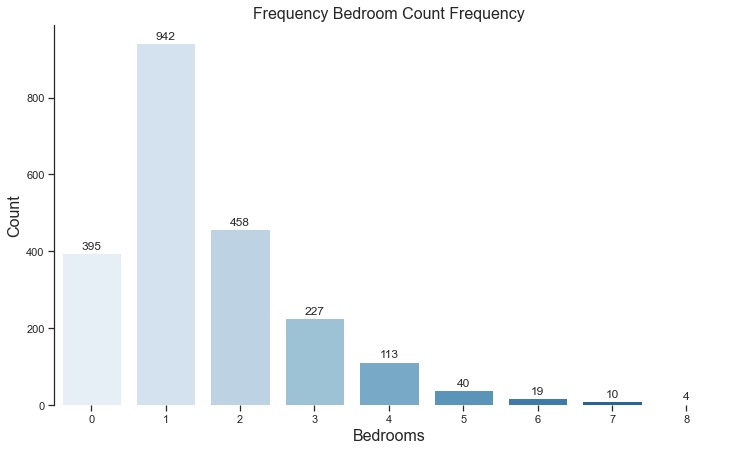

In [11]:
# countplot to visualize frequency of bedrooms in all listings

sns.set_palette("Blues", len(mean_price_by_bedrooms))
sns.set_style('white')
sns.set_style("ticks")

ax = sns.countplot(x='bedrooms', data=listings)
plt.title('Frequency Bedroom Count Frequency', fontsize=16)
plt.ylabel('Count',  fontsize=16)
plt.xlabel('Bedrooms', fontsize=16)
sns.despine(bottom=True)

for p in ax.patches:
    # get the height of each bar
    height = p.get_height()
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
    y = height+10, # y-coordinate position of data label, padded 100 above bar
    s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
    ha = 'center') # sets horizontal alignment (ha) to center

plt.show()

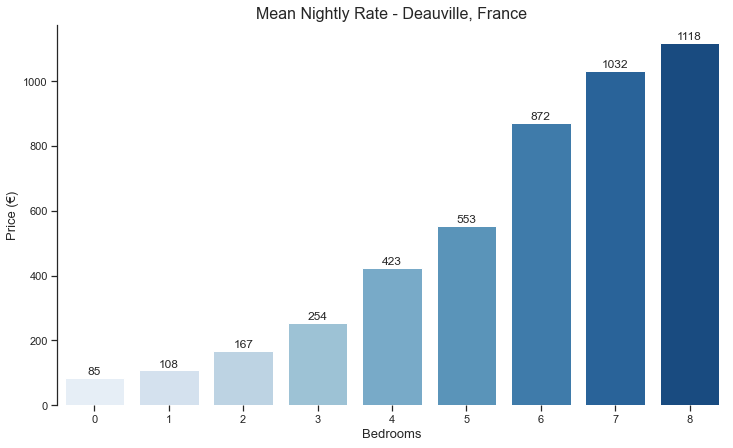

In [12]:
# barplot to visualize the mean nightly rate, by bedroom

ax = sns.barplot(data=mean_price_by_bedrooms, x='bedrooms', y='price')
plt.ylabel('Price (€)',  fontsize=13)
plt.xlabel('Bedrooms', fontsize=13)
plt.title('Mean Nightly Rate - Deauville, France', fontsize=16)

for p in ax.patches:
    # get the height of each bar
    height = p.get_height()
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
    y = height+10, # y-coordinate position of data label, padded 100 above bar
    s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
    ha = 'center') # sets horizontal alignment (ha) to center
    
sns.despine(bottom=True)
sns.set_palette("Blues", len(mean_price_by_bedrooms))
sns.set_style("ticks")

plt.savefig("Mean_nightly_rate_Deauville.jpg")
plt.show()

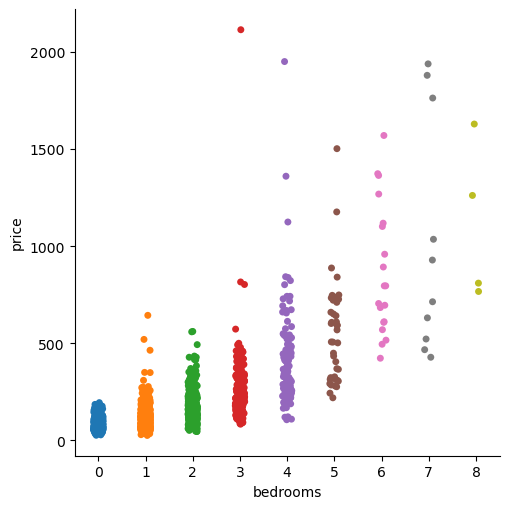

In [13]:
# catplot to visualize the spread and frequency of the nightly rate, by bedroom
sns.reset_defaults()
sns.catplot(data=listings, x='bedrooms', y='price')
plt.show()

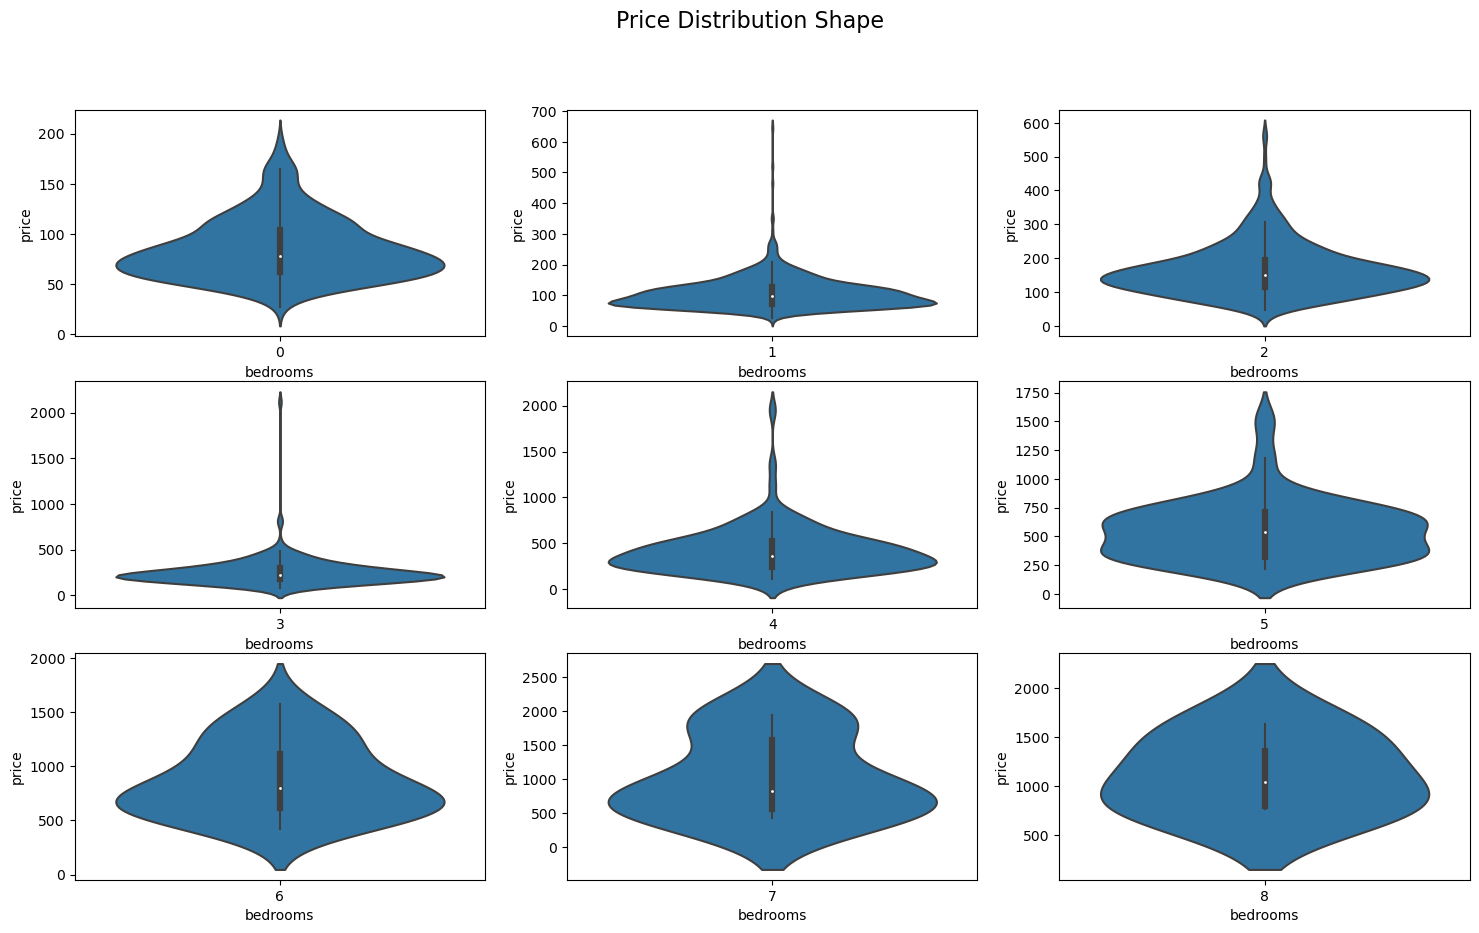

In [19]:
# Nine Violin Subplots to visualize the price shape distribution of each bedroom count category
fig, axes = plt.subplots(3, 3, figsize=(18, 10))

fig.suptitle('Price Distribution Shape', fontsize=16)

sns.violinplot(ax=axes[0, 0], data=listings[listings['bedrooms'] == 0], x='bedrooms', y='price')
sns.violinplot(ax=axes[0, 1], data=listings[listings['bedrooms'] == 1], x='bedrooms', y='price')
sns.violinplot(ax=axes[0, 2], data=listings[listings['bedrooms'] == 2], x='bedrooms', y='price')
sns.violinplot(ax=axes[1, 0], data=listings[listings['bedrooms'] == 3], x='bedrooms', y='price')
sns.violinplot(ax=axes[1, 1], data=listings[listings['bedrooms'] == 4], x='bedrooms', y='price')
sns.violinplot(ax=axes[1, 2], data=listings[listings['bedrooms'] == 5], x='bedrooms', y='price')
sns.violinplot(ax=axes[2, 0], data=listings[listings['bedrooms'] == 6], x='bedrooms', y='price')
sns.violinplot(ax=axes[2, 1], data=listings[listings['bedrooms'] == 7], x='bedrooms', y='price')
sns.violinplot(ax=axes[2, 2], data=listings[listings['bedrooms'] == 8], x='bedrooms', y='price')
plt.show()